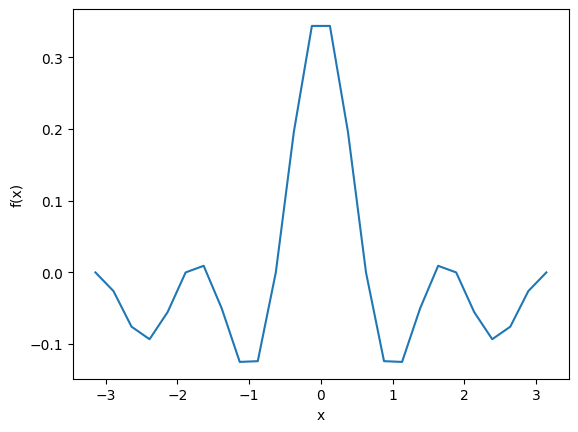

In [13]:
import pennylane.numpy as np
import matplotlib.pyplot as plt

domain = [-np.pi, np.pi]
omegas = np.array([1, 2, 3, 4])
coefficients = np.array([0.5, 0.5, 0.5, 0.5])

# Calculate the number of required samples to satisfy the Nyquist criterium
n_d = int(np.ceil(2 * np.max(np.abs(domain)) * np.max(omegas)))
# Sample the domain linearly
x = np.linspace(domain[0], domain[1], num=n_d)


# define our Fourier series f(x)
def f(x):
    return 1 / np.linalg.norm(omegas) * np.sum(coefficients * np.cos(omegas.T * x))


# evaluate f(x) on the domain samples
y = np.stack([f(sample) for sample in x])

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.savefig("figures/fourier_series_light.png", dpi=100, transparent=True)
plt.show()

In [14]:
from qml_essentials.model import Model

model = Model(
    n_qubits=4,
    n_layers=1,
    circuit_type="Circuit_19",
)

Epoch: 100, Cost: 0.0081
Epoch: 200, Cost: 0.0073
Epoch: 300, Cost: 0.0051
Epoch: 400, Cost: 0.0043
Epoch: 500, Cost: 0.0036
Epoch: 600, Cost: 0.0022
Epoch: 700, Cost: 0.0014
Epoch: 800, Cost: 0.0008
Epoch: 900, Cost: 0.0006
Epoch: 1000, Cost: 0.0001


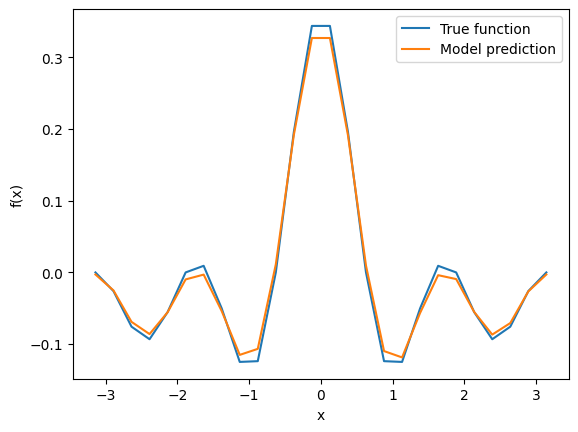

In [15]:
import pennylane as qml

opt = qml.AdamOptimizer(stepsize=0.01)


def cost_fct(params):
    y_hat = model(params=params, inputs=x, force_mean=True)

    return np.mean((y_hat - y) ** 2)


for epoch in range(1, 1001):
    model.params, cost_val = opt.step_and_cost(cost_fct, model.params)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Cost: {cost_val:.4f}")

plt.plot(x, y, label="True function")
plt.plot(
    x, model(params=model.params, inputs=x, force_mean=True), label="Model prediction"
)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.savefig("figures/trained_series_light.png", dpi=100, transparent=True)
plt.show()

## Trainable Frequencies

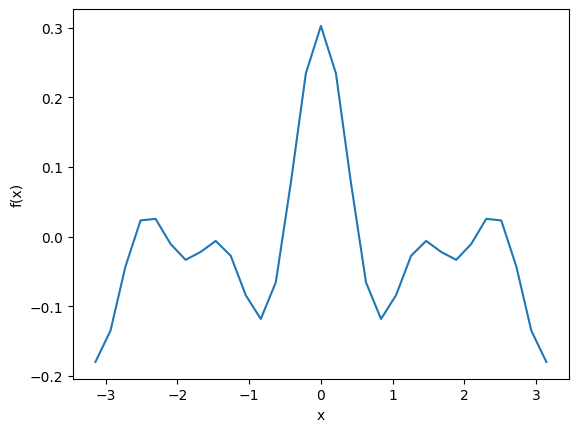

In [16]:
domain = [-np.pi, np.pi]
omegas = np.array([1.2, 2.6, 3.4, 4.9])
coefficients = np.array([0.5, 0.5, 0.5, 0.5])

# Calculate the number of required samples to satisfy the Nyquist criterium
n_d = int(np.ceil(2 * np.max(np.abs(domain)) * np.max(omegas)))
# Sample the domain linearly
x = np.linspace(domain[0], domain[1], num=n_d)


# define our Fourier series f(x)
def f(x):
    return 1 / np.linalg.norm(omegas) * np.sum(coefficients * np.cos(omegas.T * x))


# evaluate f(x) on the domain samples
y = np.stack([f(sample) for sample in x])

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.savefig(
    "figures/fourier_series_tf_light.png", dpi=100, transparent=True, edgecolor="white"
)
plt.show()

In [17]:
model = Model(
    n_qubits=4, n_layers=1, circuit_type="Circuit_19", trainable_frequencies=False
)
model_tf = Model(
    n_qubits=4, n_layers=1, circuit_type="Circuit_19", trainable_frequencies=True
)

Training fixed frequency model
Epoch: 100, Cost: 0.0082
Epoch: 200, Cost: 0.0067
Epoch: 300, Cost: 0.0038
Epoch: 400, Cost: 0.0031
Epoch: 500, Cost: 0.0027
Epoch: 600, Cost: 0.0026
Epoch: 700, Cost: 0.0025
Epoch: 800, Cost: 0.0024
Epoch: 900, Cost: 0.0023
Epoch: 1000, Cost: 0.0023

Training trainable frequency model
Epoch: 100, Cost: 0.008454
Epoch: 200, Cost: 0.002759
Epoch: 300, Cost: 0.002382
Epoch: 400, Cost: 0.001655
Epoch: 500, Cost: 0.000232
Epoch: 600, Cost: 0.000019
Epoch: 700, Cost: 0.000010
Epoch: 800, Cost: 0.000003
Epoch: 900, Cost: 0.000001
Epoch: 1000, Cost: 0.000001


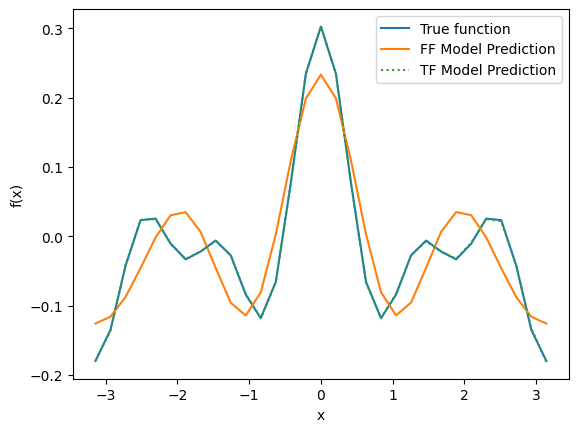

In [18]:
# - Fixed Frequencies -
opt = qml.AdamOptimizer(stepsize=0.01)

print("Training fixed frequency model")
for epoch in range(1, 1001):
    model.params, cost_val = opt.step_and_cost(cost_fct, model.params)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Cost: {cost_val:.4f}")

# - Trainable Frequencies -
opt = qml.AdamOptimizer(stepsize=0.01)


def cost_fct_tf(params, enc_params):
    y_hat = model_tf(params=params, enc_params=enc_params, inputs=x, force_mean=True)
    return np.mean((y_hat - y) ** 2)


print(f"\nTraining trainable frequency model")
for epoch in range(1, 1001):
    (model_tf.params, model_tf.enc_params), cost_val_tf = opt.step_and_cost(
        cost_fct_tf, model_tf.params, model_tf.enc_params
    )

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Cost: {cost_val_tf:.6f}")

plt.plot(x, y, label="True function")
plt.plot(
    x,
    model(params=model.params, inputs=x, force_mean=True),
    label="FF Model Prediction",
)
plt.plot(
    x,
    model_tf(
        params=model_tf.params,
        enc_params=model_tf.enc_params,
        inputs=x,
        force_mean=True,
    ),
    label="TF Model Prediction",
    linestyle="dotted",
)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.savefig(
    "figures/trained_series_tf_light.png", dpi=100, transparent=True, edgecolor="white"
)
plt.show()

In [19]:
print(f"Encoding parameters of the fixed frequencies model: {model.enc_params}")
print(
    f"Encoding parameters of the trainable frequencies model: {np.round(model_tf.enc_params, 3)}"
)

Encoding parameters of the fixed frequencies model: [1. 1. 1. 1.]
Encoding parameters of the trainable frequencies model: [1.001 2.065 2.817 0.364]
